In [85]:
import re
from os import listdir
from collections import Counter
from pprint import pprint
import os
import matplotlib.pyplot as plt
import networkx as nx

In [81]:
#path = 'C:\\Python37\\Lib\\site-packages\\regex\\'
#path = '/home/ksn38/.local/lib/python3.6/site-packages/argon2/'
#path = '/usr/lib/python3.6/'
def open_and_re(path):
    with open(path, 'r', encoding='utf-8') as file:
        print(f'====={path}=====')
        #pprint(re.findall('import.+', file.read()))
        classes = re.findall('class\s\w+\(\w+\)|class\s\w+\:', file.read())
        list_classes = []
        list_classes_for_graph = []
        for i in classes:
            list_1_or_2_classes = re.findall('\w+', i[6:])
            list_classes.extend(list_1_or_2_classes)
            if len(list_1_or_2_classes) > 1:
                list_classes_for_graph.append(list_1_or_2_classes)
        counter_classes = Counter(list_classes)
        for c in classes:
            c_key = re.findall('\w+', c[6:])[0]
            print(f'{c} = {counter_classes[c_key]}') 
    return list_classes, list_classes_for_graph
            
def printer(tuple_from_oswalk):
    files = tuple_from_oswalk[2]
    list_classes_printer = []
    list_classes_for_graph_printer = []
    for f in files:
        if tuple_from_oswalk[0][-1] != '/' and f[-3:] == '.py':
            list_classes_printer.extend(open_and_re(tuple_from_oswalk[0] + '/' + f)[0])
            list_classes_for_graph_printer.extend(open_and_re(tuple_from_oswalk[0] + '/' + f)[1])
        elif tuple_from_oswalk[0][-1] == '/' and f[-3:] == '.py':
            list_classes_printer.extend(open_and_re(tuple_from_oswalk[0] + f)[0])
            list_classes_for_graph_printer.extend(open_and_re(tuple_from_oswalk[0] + f)[1])
    return list_classes_printer, list_classes_for_graph_printer


In [144]:
list_of_all_classes = []
list_of_all_classes_for_graph = []

for i in os.walk('/home/ksn38/.local/lib/python3.6/site-packages/geopandas/'):
    list_of_all_classes.extend(printer(i)[0])
    list_of_all_classes_for_graph.extend(printer(i)[1])

print('ALL CLASSES', Counter(list_of_all_classes))

=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/_config.py=====
class Options(object) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/_config.py=====
class Options(object) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/sindex.py=====
class BaseSpatialIndex: = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/sindex.py=====
class BaseSpatialIndex: = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/plotting.py=====
class GeoplotAccessor(PlotAccessor) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/plotting.py=====
class GeoplotAccessor(PlotAccessor) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/base.py=====
class GeoPandasBase(object) = 1
class _CoordinateIndexer(object) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geopandas/base.py=====
class GeoPandasBase(object) = 1
class _CoordinateIndexer(object) = 1
=====/home/ksn38/.local/lib/python3.6/site-packages/geop

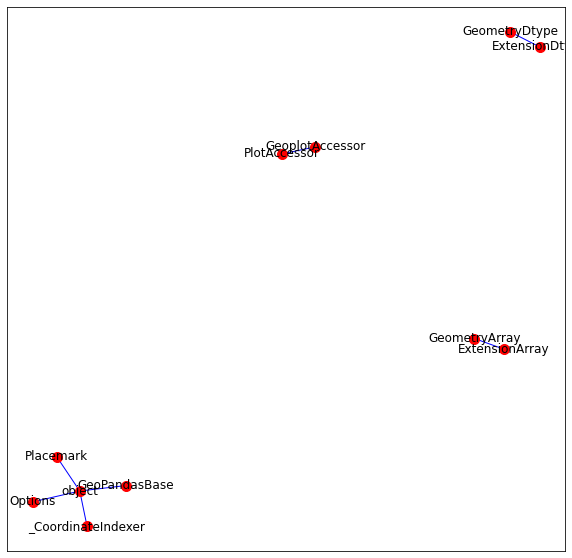

In [149]:
plt.figure(figsize=(10,10))
# создаем граф
G = nx.Graph()
# заполняем ребра графа
for i in list_of_all_classes_for_graph:
    G.add_edge(*i, minlen = 1000)

pos = nx.spring_layout(G, k=0.05, iterations=25)
nx.draw_networkx(G, pos, node_color='r', edge_color='b', node_size=100)

plt.show()